In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./MLC_SP23/clean_data/regression_data.csv", low_memory=False, index_col=[0])

In [2]:
df.head()

,bbl,rs_share_diff,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,...,pop_race_div_idx_19,boro_2,boro_3,boro_4,boro_5,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1
0,1000780047,0.0000,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.450691,0,0,0,0,12.276639,0.150551,0.018246,0.035008,0.074674
1,1001350019,0.0000,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.457072,0,0,0,0,12.897523,0.096864,0.055298,0.002253,0.014341
2,1001620013,-0.0500,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.612518,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935
3,1001630024,0.1875,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.612518,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935
4,1001630033,0.0000,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,...,0.612518,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935


In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

%matplotlib inline 

In [4]:
# df['total_units_19'].quantile([0.1,0.2,0.3,0.4,0.5])

In [5]:
# df['unit_bin'] = pd.cut(df['total_units_19'], 
#                           bins=df['total_units_19'].quantile(np.arange(0,1.05,0.05)).values, 
#                           include_lowest=True,
#                           duplicates='drop') 

In [6]:
# df.loc[df['total_units_19'] <= 6.0, ['rs_share_diff']]

In [7]:
# df.groupby(['unit_bin'])['total_units_19','rs_share_diff'].mean()

### 1. Gradient Boosting Regressor - all buildings

In [8]:
X = df.drop(['rs_share_diff','bbl'], axis = 1)
y = df['rs_share_diff']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [11]:
# Fit model

gbr_params = {'n_estimators' : [200],
            'max_depth'    : [4,5],
             }

model_gb = GradientBoostingRegressor()
gr_gb = GridSearchCV(model_gb, param_grid = gbr_params, cv = 4)
fit_gb = gr_gb.fit(X_train, y_train)
print(fit_gb.best_estimator_)

GradientBoostingRegressor(max_depth=4, n_estimators=200)


In [12]:
# Test set prediction

from sklearn.metrics import mean_squared_error

y_hat_gb_test = fit_gb.predict(X_test)
rmse = mean_squared_error(y_test, y_hat_gb_test, squared=False)

print("RMSE: ", rmse)

RMSE:  0.3207014200782403


Computing partial dependence plots...


/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


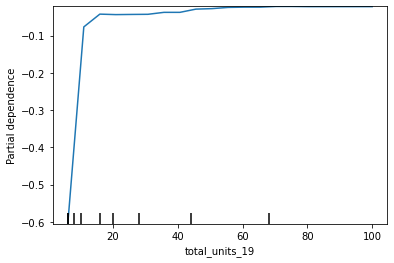

In [13]:
# Path Dependency

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

print('Computing partial dependence plots...')
features = ['total_units_19']
plot_partial_dependence(fit_gb, X_train, features,
                        n_jobs=3, grid_resolution=20)

fig = plt.gcf()

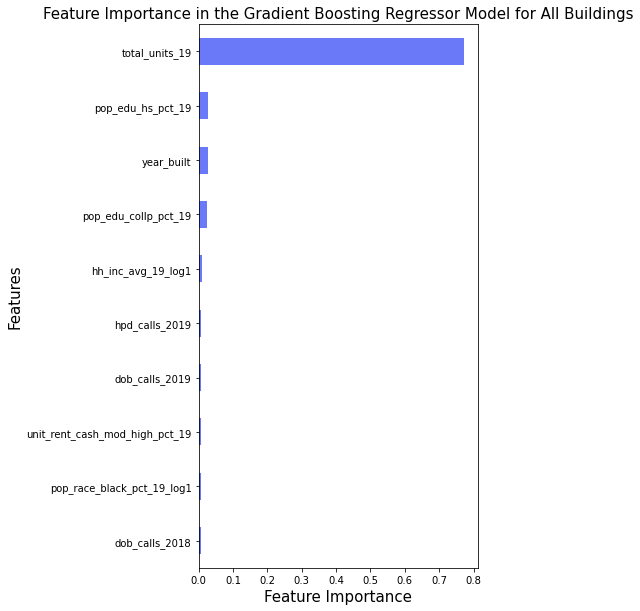

In [14]:
# Get Feature importance data using feature_importances_attribute

plt.figure(figsize=(5,10))
importances = pd.Series(fit_gb.best_estimator_.feature_importances_, X_train.columns)
importances.sort_values().tail(10).plot.barh(color = '#6a79f7')
plt.title('Feature Importance in the Gradient Boosting Regressor Model for All Buildings',fontsize=15)
plt.xlabel('Feature Importance',fontsize = 15)
plt.ylabel('Features',fontsize = 15)
plt.show()


### 2. Gradient Boosting Regressor - buildings <= 6 units

In [15]:
df_small = df[df['total_units_19'] <= 6].reset_index(drop=True)

In [16]:
X = df_small.drop(['rs_share_diff','bbl'], axis = 1)
y = df_small['rs_share_diff']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [18]:
# Fit model

gbr_params = {'n_estimators' : [200],
            'max_depth'    : [4,5],
             }

model_gb = GradientBoostingRegressor()
gr_gb = GridSearchCV(model_gb, param_grid = gbr_params, cv = 4)
fit_gb_small = gr_gb.fit(X_train, y_train)
print(fit_gb.best_estimator_)

GradientBoostingRegressor(max_depth=4, n_estimators=200)


In [19]:
# Test set prediction

from sklearn.metrics import mean_squared_error

y_hat_gb_test = fit_gb_small.predict(X_test)
rmse = mean_squared_error(y_test, y_hat_gb_test, squared=False)

print("RMSE_small: ", rmse)

RMSE_small:  0.32055959795183303


/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


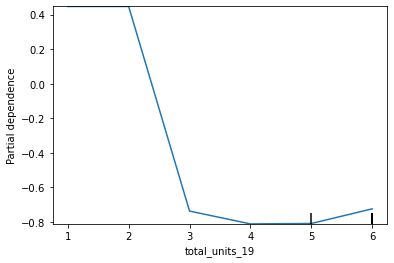

In [20]:
# Path Dependency

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

features = ['total_units_19']
plot_partial_dependence(fit_gb_small, X_train, features,
                        n_jobs=3, grid_resolution=20)

fig = plt.gcf()


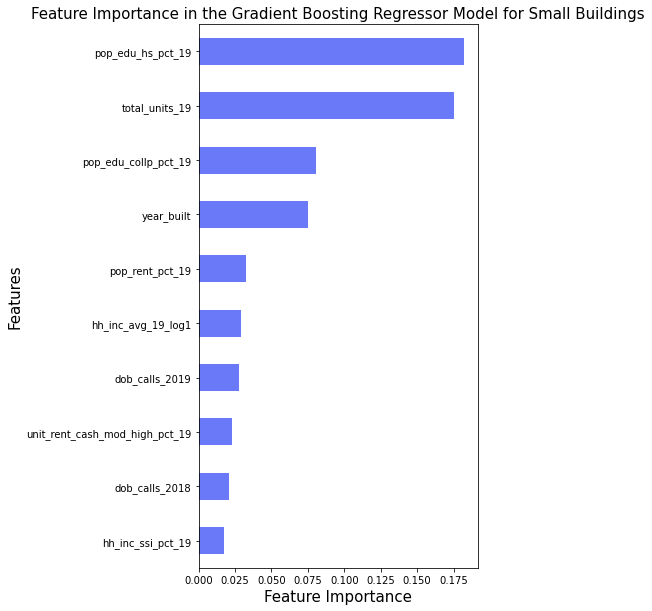

In [21]:
# Get Feature importance data using feature_importances_attribute

plt.figure(figsize=(5,10))
importances = pd.Series(fit_gb_small.best_estimator_.feature_importances_, X_train.columns)
importances.sort_values().tail(10).plot.barh(color = '#6a79f7')
plt.title('Feature Importance in the Gradient Boosting Regressor Model for Small Buildings',fontsize=15)
plt.xlabel('Feature Importance',fontsize = 15)
plt.ylabel('Features',fontsize = 15)
plt.show()


### 3. Gradient Boosting Regressor - buildings > 6 units

In [22]:
df_big = df[df['total_units_19'] > 6].reset_index(drop=True)

In [23]:
X = df_big.drop(['rs_share_diff','bbl'], axis = 1)
y = df_big['rs_share_diff']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [25]:
# Fit model

gbr_params = {'n_estimators' : [200],
            'max_depth'    : [4,5],
             }

model_gb = GradientBoostingRegressor()
gr_gb = GridSearchCV(model_gb, param_grid = gbr_params, cv = 4)
fit_gb_big = gr_gb.fit(X_train, y_train)
print(fit_gb.best_estimator_)

GradientBoostingRegressor(max_depth=4, n_estimators=200)


In [26]:
# Test set prediction

y_hat_gb_test = fit_gb_big.predict(X_test)
rmse_big = mean_squared_error(y_test, y_hat_gb_test, squared=False)

print("RMSE_big: ", rmse_big)

RMSE_big:  0.3270265730989778


/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


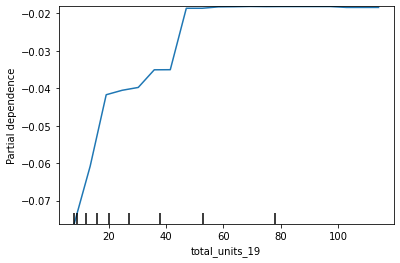

In [27]:
# Path Dependency

features = ['total_units_19']
plot_partial_dependence(fit_gb_big, X_train, features,
                        n_jobs=3, grid_resolution=20)

fig = plt.gcf()


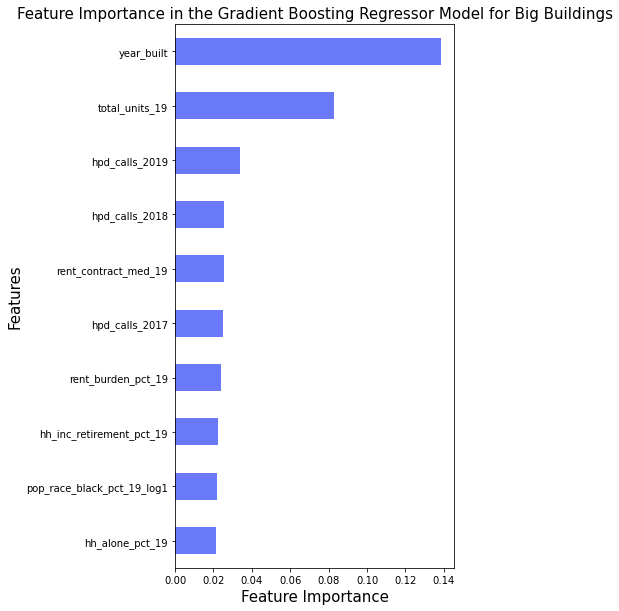

In [28]:
# Get Feature importance data using feature_importances_attribute
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.figure(figsize=(5,10))
importances = pd.Series(fit_gb_big.best_estimator_.feature_importances_, X_train.columns)
importances.sort_values().tail(10).plot.barh(color = '#6a79f7')
plt.title('Feature Importance in the Gradient Boosting Regressor Model for Big Buildings',fontsize=15)
plt.xlabel('Feature Importance',fontsize = 15)
plt.ylabel('Features',fontsize = 15)
plt.show()
